# Performance of VGG16

In [3]:
% matplotlib inline

import os
import matplotlib.pyplot as plt

from scripts.utils import ExpResults

In [4]:
plotproperties = {'font.size': 13,
                  'axes.titlesize': 'xx-large',
                  'axes.labelsize': 'xx-large',
                  'xtick.labelsize': 'xx-large',
                  'xtick.major.size': 7,
                  'xtick.minor.size': 5,
                  'ytick.labelsize': 'xx-large',
                  'ytick.major.size': 7,
                  'ytick.minor.size': 5,
                  'legend.fontsize': 'xx-large',
                  'figure.figsize': (7, 6),
                  'savefig.dpi': 300,
                  'savefig.format': 'jpg'}

import matplotlib as mpl
mpl.rcParams.update(plotproperties)

## Parameters and definitions

In [12]:
log_dir = '/home/rbodo/.snntoolbox/data/imagenet/vgg16/keras/maxpool/log'
runlabel_analog = '05'
path_analog = os.path.join(log_dir, 'gui', runlabel_analog)

clamp = 0  # 84 - 1

scale = 1e3  # Scale from Million to Billion operations

## Performance of ANN and NHP

In [13]:
exp_analog = ExpResults(path_analog, 'SNN', '.', scale=scale)
experiments = [exp_analog]

## Plot number of operations vs time

NameError: name 'c_ANN' is not defined

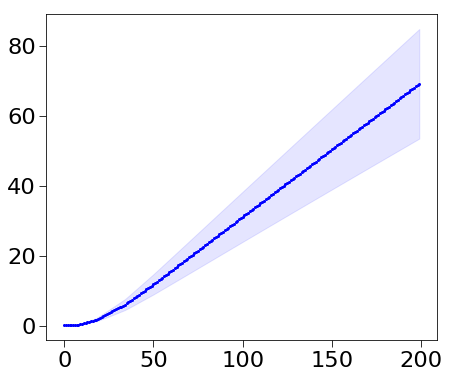

In [6]:
for exp in experiments:
    plt.plot(exp.time, exp.mean_computations_t, exp.marker, color=exp.color1, markersize=exp.markersize, label=exp.label)
    plt.fill_between(exp.time, exp.mean_computations_t-exp.std_computations_t, exp.mean_computations_t+exp.std_computations_t, alpha=0.1, color=exp.color1)
plt.hlines(c_ANN, 0, experiments[0].time[-1], linewidth=1, label='ANN')
plt.vlines(clamp, 0, 80, linewidth=1, label='clamp lifted', colors='brown')
plt.ylabel('GOps')
plt.xlabel('Simulation time')
plt.legend()
plt.ylim(0, None)
plt.savefig(os.path.join(log_dir, 'ops_vs_t'), bbox_inches='tight')

## Plot error vs time

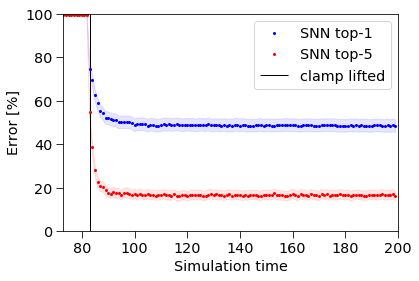

In [45]:
for exp in experiments:
    plt.plot(exp.time, exp.e1_mean, exp.marker, color=exp.color1, markersize=exp.markersize, label=exp.label+' top-1')
    plt.fill_between(exp.time, exp.e1_mean-exp.e1_confidence95, exp.e1_mean+exp.e1_confidence95, alpha=0.1, color=exp.color1)
    plt.plot(exp.time, exp.e5_mean, exp.marker, color=exp.color5, markersize=exp.markersize, label=exp.label+' top-5')
    plt.fill_between(exp.time, exp.e5_mean-exp.e5_confidence95, exp.e5_mean+exp.e5_confidence95, alpha=0.1, color=exp.color5)
plt.vlines(clamp, 0, 100, linewidth=1, label='clamp lifted')
plt.ylabel('Error [%]')
plt.xlabel('Simulation time')
plt.xlim(clamp-10, 200)
plt.ylim(0, 100)
plt.legend()
plt.savefig(os.path.join(log_dir, 'err_vs_t'), bbox_inches='tight')

## Plot error vs operations

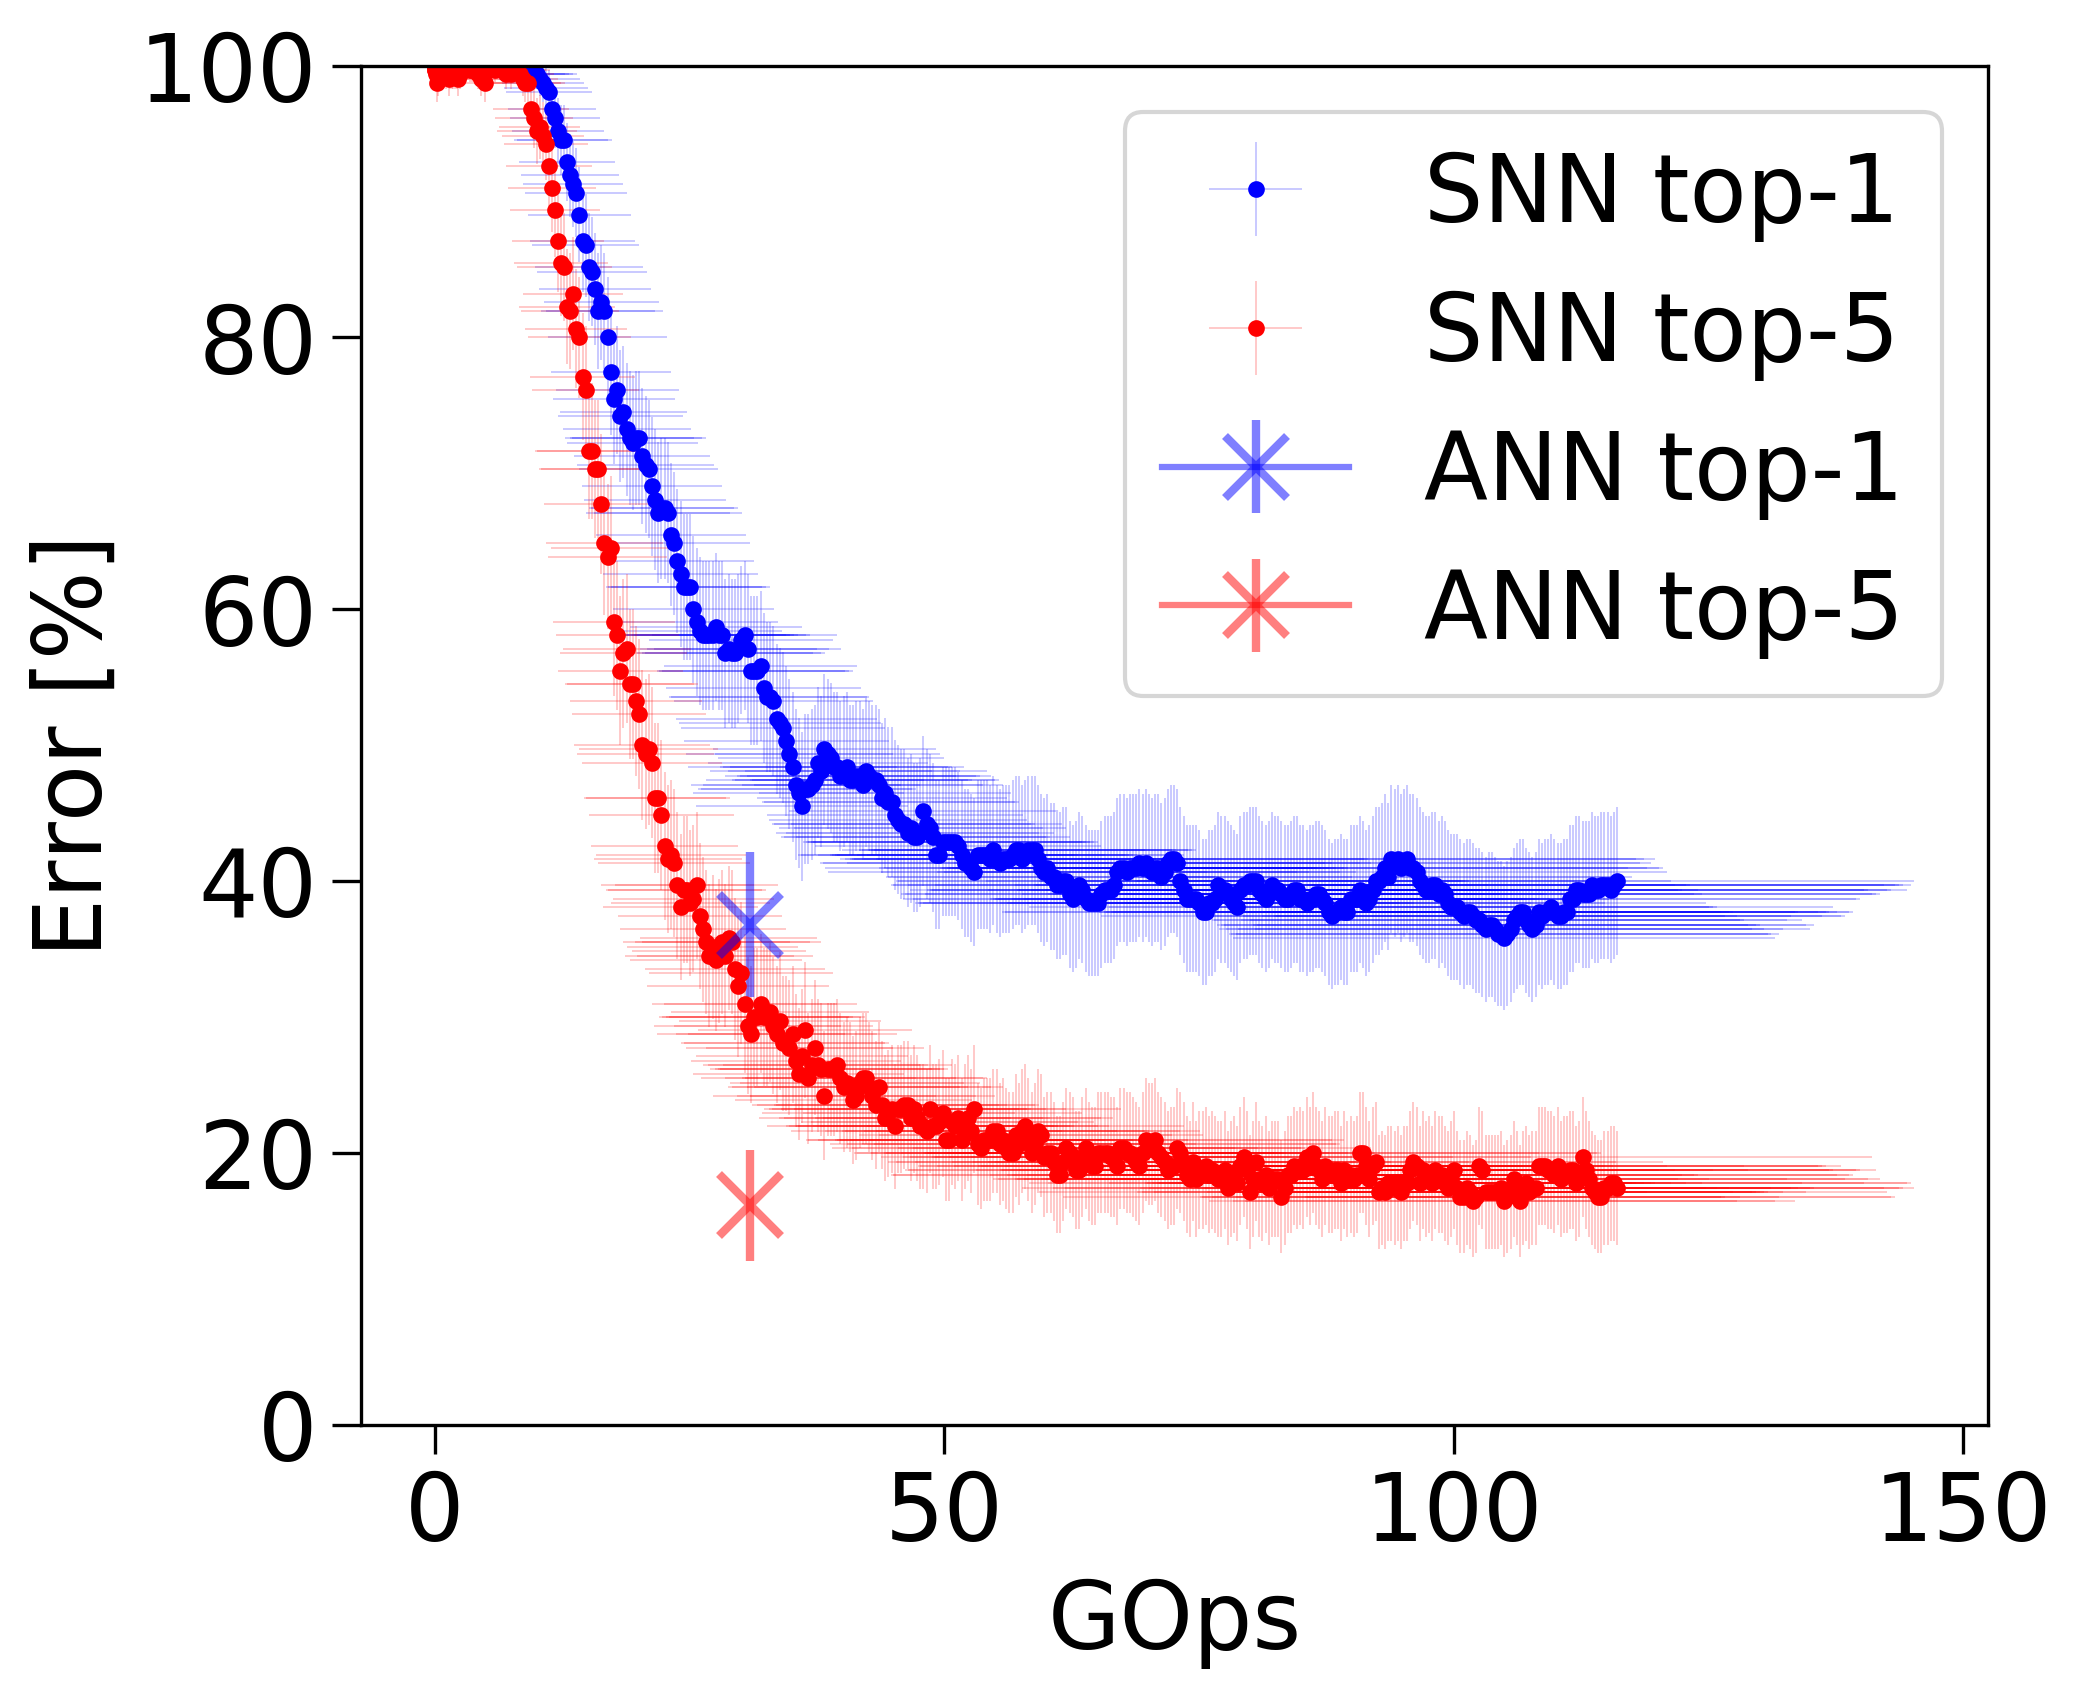

In [14]:
show_numbers = False

exp = experiments[0]
plt.errorbar(exp.mean_computations_t[clamp:], exp.e1_mean[clamp:], xerr=exp.std_computations_t[clamp:],
             yerr=exp.e1_confidence95[clamp:], fmt=exp.marker, label=exp.label+' top-1', capsize=0, elinewidth=0.1, color=exp.color1)
plt.errorbar(exp.mean_computations_t[clamp:], exp.e5_mean[clamp:], xerr=exp.std_computations_t[clamp:],
             yerr=exp.e5_confidence95[clamp:], fmt=exp.marker, label=exp.label+' top-5', capsize=0, elinewidth=0.1, color=exp.color5)

plt.errorbar(exp.operations_ann, exp.e1_ann, marker='x', label='ANN top-1', color=exp.color1, markersize=15,
             yerr=exp.e1_confidence95_ann, elinewidth=2, capthick=2, markeredgewidth=2, alpha=0.5)
plt.errorbar(exp.operations_ann, exp.e5_ann, marker='x', label='ANN top-5', color=exp.color5, markersize=15,
             yerr=exp.e5_confidence95_ann, elinewidth=2, capthick=2, markeredgewidth=2, alpha=0.5)

if show_numbers:
    plt.annotate('({:.2f}, {:.2f})'.format(exp.operations_ann, exp.e1_ann), xy=(exp.operations_ann - 0.15, exp.e1_ann + 10), color=exp.color1)
    plt.annotate('({:.2f}, {:.2f})'.format(exp.operations_ann, exp.e5_ann), xy=(exp.operations_ann - 0.15, exp.e5_ann + 10), color=exp.color5)
    plt.annotate('({:.2f}, {:.2f})'.format(exp.op1_optimal, exp.e1_optimal), xy=(exp.op1_optimal, exp.e1_optimal),
                 xytext=(exp.op1_optimal, exp.e1_optimal + 10),
                 arrowprops=dict(color=exp.color1, shrink=0.05, width=5, headwidth=10), color=exp.color1)
    plt.annotate('({:.2f}, {:.2f})'.format(exp.op5_optimal, exp.e5_optimal), xy=(exp.op5_optimal, exp.e5_optimal),
                 xytext=(exp.op5_optimal, exp.e5_optimal + 10),
                 arrowprops=dict(color=exp.color5, shrink=0.05, width=5, headwidth=10), color=exp.color5)

plt.ylim(0, 100)
#plt.xlim(24, 32.5)
plt.ylabel('Error [%]')
plt.xlabel('GOps')
plt.legend(loc='upper right')
#plt.title('ANN vs SNN performance')
plt.savefig(os.path.join(log_dir, 'err_vs_ops'), bbox_inches='tight')

In [16]:
for exp in experiments:
    print('ANN top-1:                         ({:.5f} GOps/frame, {:.2f} %)'.format(exp.operations_ann, exp.e1_ann))
    print('SNN top-1 best error:         ({:.5f} GOps/frame, {:.2f} %)'.format(exp.op1_0, exp.e1_0))
    print('SNN top-1 converged:        ({:.5f} GOps/frame, {:.2f} %)'.format(exp.op1_1, exp.e1_1))
    print('SNN top-1 jointly optimal:  ({:.5f} GOps/frame, {:.2f} %)'.format(exp.op1_optimal, exp.e1_optimal))
    print('SNN top-1 same op:           ({:.5f} GOps/frame, {:.2f} %)'.format(exp.op1_2, exp.e1_2))
    print('ANN top-5:                         ({:.5f} GOps/frame, {:.2f} %)'.format(exp.operations_ann, exp.e5_ann))
    print('SNN top-5 best error:         ({:.5f} GOps/frame, {:.2f} %)'.format(exp.op5_0, exp.e5_0))
    print('SNN top-5 converged:        ({:.5f} GOps/frame, {:.2f} %)'.format(exp.op5_1, exp.e5_1))
    print('SNN top-5 jointly optimal:  ({:.5f} GOps/frame, {:.2f} %)'.format(exp.op5_optimal, exp.e5_optimal))
    print('SNN top-5 same op:           ({:.5f} GOps/frame, {:.2f} %)'.format(exp.op5_2, exp.e5_2))

ANN top-1:                         (30.95409 GOps/frame, 36.77 %)
SNN top-1 best error:         (104.98071 GOps/frame, 35.81 %)
SNN top-1 converged:        (102.83298 GOps/frame, 36.77 %)
SNN top-1 jointly optimal:  (36.04650 GOps/frame, 45.48 %)
SNN top-1 same op:           (31.02367 GOps/frame, 55.48 %)
ANN top-5:                         (30.95409 GOps/frame, 16.13 %)
SNN top-5 best error:         (101.90954 GOps/frame, 16.45 %)
SNN top-5 converged:        (77.83809 GOps/frame, 17.42 %)
SNN top-5 jointly optimal:  (31.02367 GOps/frame, 28.71 %)
SNN top-5 same op:           (31.02367 GOps/frame, 28.71 %)
